In [27]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_rm_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [28]:
data

['t_n55          7.1665 ( 6.6796,  7.9936) ( 6.6095,  7.8658)  1.2564 (Jnode 106)\n',
 't_n56          6.9972 ( 6.6043,  7.7423) ( 6.5427,  7.6143)  1.0716 (Jnode 105)\n',
 't_n57          6.5615 ( 6.2196,  7.2567) ( 6.1725,  7.1350)  0.9625 (Jnode 104)\n',
 't_n58          5.5536 ( 5.3197,  6.1388) ( 5.2923,  6.0075)  0.7152 (Jnode 103)\n',
 't_n59          5.3768 ( 5.1599,  5.9412) ( 5.1519,  5.8113)  0.6595 (Jnode 102)\n',
 't_n60          5.1329 ( 4.9118,  5.6746) ( 4.8808,  5.5586)  0.6778 (Jnode 101)\n',
 't_n61          4.7853 ( 4.5571,  5.2873) ( 4.5278,  5.2041)  0.6763 (Jnode 100)\n',
 't_n62          2.1502 ( 1.8694,  2.4750) ( 1.8569,  2.4596)  0.6027 (Jnode 99)\n',
 't_n63          3.3497 ( 3.0978,  3.7304) ( 3.0722,  3.6830)  0.6109 (Jnode 98)\n',
 't_n64          2.3964 ( 2.1708,  2.6954) ( 2.1523,  2.6672)  0.5149 (Jnode 97)\n',
 't_n65          2.1145 ( 1.9066,  2.3878) ( 1.8923,  2.3666)  0.4743 (Jnode 96)\n',
 't_n66          1.6578 ( 1.4769,  1.8854) ( 1.4632,  1.86

In [29]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [30]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [31]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [32]:
posterior_mean_iqtree

[7.1665,
 6.9972,
 6.5615,
 5.5536,
 5.3768,
 5.1329,
 4.7853,
 2.1502,
 3.3497,
 2.3964,
 2.1145,
 1.6578,
 1.1401,
 0.7647,
 0.3056,
 2.5345,
 5.2386,
 4.9916,
 4.7709,
 3.4288,
 3.0817,
 2.6829,
 5.1071,
 4.872,
 4.6725,
 4.393,
 4.0212,
 3.9008,
 3.4352,
 3.1432,
 2.9004,
 2.2041,
 2.0279,
 3.4533,
 2.8073,
 5.0136,
 1.1198,
 4.8698,
 4.5725,
 4.1155,
 3.8273,
 2.8409,
 3.2429,
 3.9318,
 3.7757,
 3.4853,
 2.6557,
 3.4047,
 5.9265,
 4.3908,
 2.7633,
 2.0832,
 4.8561]

In [33]:
lower_ci_iqtree

[6.6796,
 6.6043,
 6.2196,
 5.3197,
 5.1599,
 4.9118,
 4.5571,
 1.8694,
 3.0978,
 2.1708,
 1.9066,
 1.4769,
 0.9986,
 0.6607,
 0.2537,
 2.2923,
 5.0124,
 4.7167,
 4.5395,
 3.1533,
 2.8036,
 2.3484,
 4.8756,
 4.6358,
 4.4348,
 4.1586,
 3.7959,
 3.6742,
 3.215,
 2.9301,
 2.6932,
 2.0161,
 1.8453,
 3.2223,
 2.578,
 4.7801,
 0.892,
 4.6382,
 4.3447,
 3.8885,
 3.6019,
 2.604,
 3.0135,
 3.7011,
 3.5432,
 3.2431,
 2.4131,
 3.1157,
 5.5985,
 4.0241,
 2.4122,
 1.7204,
 4.2236]

In [34]:
upper_ci_iqtree

[7.9936,
 7.7423,
 7.2567,
 6.1388,
 5.9412,
 5.6746,
 5.2873,
 2.475,
 3.7304,
 2.6954,
 2.3878,
 1.8854,
 1.3087,
 0.8871,
 0.3664,
 2.8518,
 5.79,
 5.5259,
 5.274,
 3.8229,
 3.4531,
 3.0699,
 5.6487,
 5.3893,
 5.1667,
 4.8622,
 4.4504,
 4.32,
 3.8104,
 3.4905,
 3.2267,
 2.468,
 2.2783,
 3.8321,
 3.1367,
 5.5459,
 1.3819,
 5.385,
 5.059,
 4.5565,
 4.2413,
 3.1784,
 3.6067,
 4.3565,
 4.1847,
 3.8759,
 2.9799,
 3.8051,
 6.5605,
 4.9066,
 3.1779,
 2.4895,
 5.7803]

In [35]:
file_LG = open("LG_rm_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

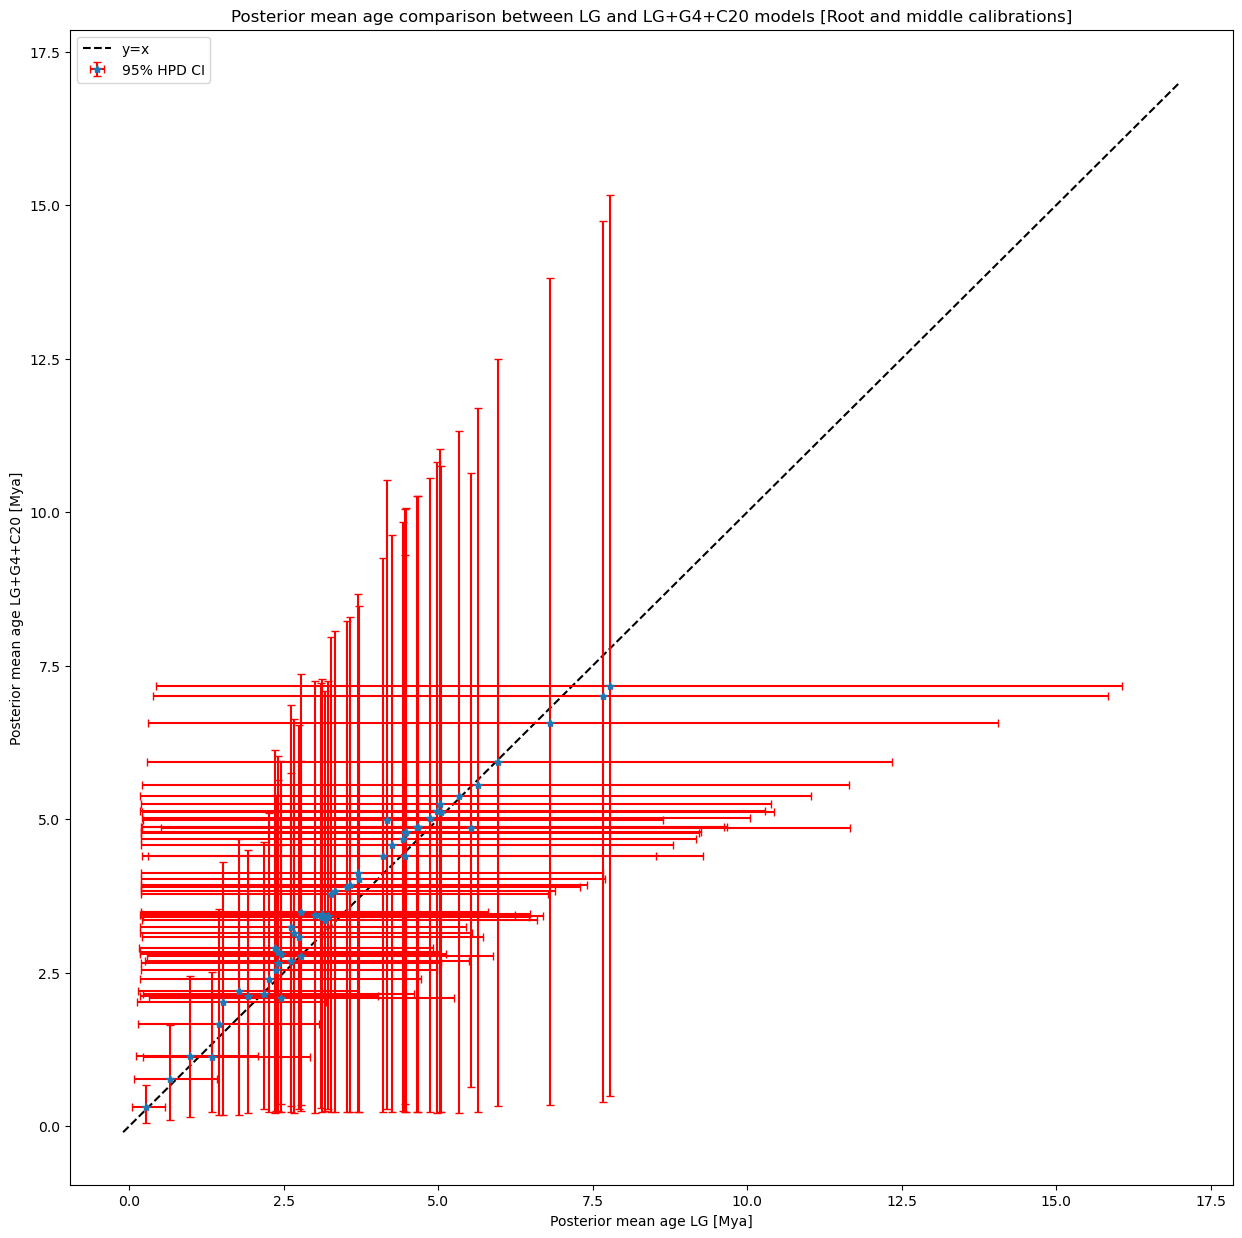

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [Root and middle calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_rm.png')

In [37]:
posterior_mean_baseml

[7.7849,
 7.6699,
 6.8023,
 5.6364,
 5.3342,
 4.9732,
 4.4709,
 2.1818,
 3.1726,
 2.2545,
 1.915,
 1.4557,
 0.985,
 0.6623,
 0.2666,
 2.3801,
 5.0243,
 4.1661,
 4.4558,
 3.2081,
 2.738,
 2.6102,
 5.0426,
 4.6715,
 4.4281,
 4.1093,
 3.7154,
 3.5173,
 3.0049,
 2.6629,
 2.3555,
 1.7708,
 1.5151,
 3.121,
 2.4551,
 4.8584,
 1.3449,
 4.6474,
 4.25,
 3.6941,
 3.3207,
 2.4083,
 2.6172,
 3.5711,
 3.2618,
 2.7861,
 2.412,
 3.1008,
 5.9664,
 4.4581,
 2.7833,
 2.4609,
 5.5276]

In [38]:
posterior_mean_iqtree

[7.1665,
 6.9972,
 6.5615,
 5.5536,
 5.3768,
 5.1329,
 4.7853,
 2.1502,
 3.3497,
 2.3964,
 2.1145,
 1.6578,
 1.1401,
 0.7647,
 0.3056,
 2.5345,
 5.2386,
 4.9916,
 4.7709,
 3.4288,
 3.0817,
 2.6829,
 5.1071,
 4.872,
 4.6725,
 4.393,
 4.0212,
 3.9008,
 3.4352,
 3.1432,
 2.9004,
 2.2041,
 2.0279,
 3.4533,
 2.8073,
 5.0136,
 1.1198,
 4.8698,
 4.5725,
 4.1155,
 3.8273,
 2.8409,
 3.2429,
 3.9318,
 3.7757,
 3.4853,
 2.6557,
 3.4047,
 5.9265,
 4.3908,
 2.7633,
 2.0832,
 4.8561]

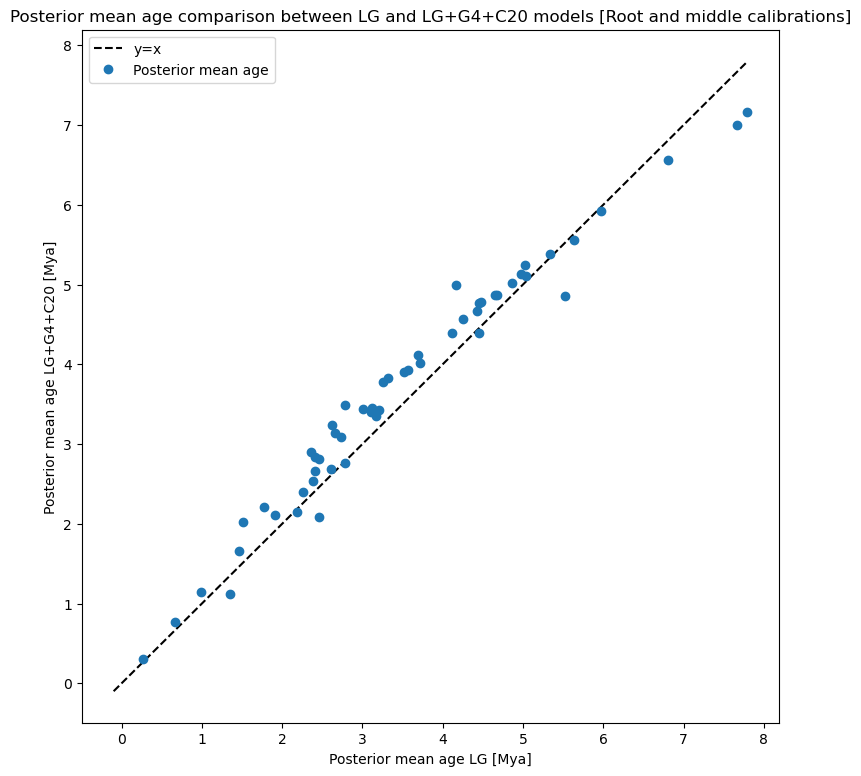

In [39]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,7.8], 
        [-0.1, 7.8], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [Root and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_rm_scatter.png')